In [1]:
from torch.autograd import Variable
from torch.utils import data
import torch
import torch.nn as nn
import pandas as pd 
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split

if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

Running on the GPU


In [2]:
file_name = input("Enter csv file name:(without quotations & with .csv)")
y_name = input("Enter variable name to be predicted:")

Enter csv file name:(without quotations & with .csv)wine.csv
Enter variable name to be predicted:quality


In [3]:
df = pd.read_csv(file_name)
df = pd.get_dummies(df)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
train, test = train_test_split(df, test_size=0.2,random_state=1)

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear2 = nn.Linear(input_dim, 2048)
        self.linear3 = nn.Linear(2048, 1024)
        self.drop_layer = nn.Dropout(p=0.1)
        self.linear4 = nn.Linear(1024, 512)
        self.linear5 = nn.Linear(512, 256)
        self.linear6 = nn.Linear(256, output_dim)

    def forward(self, x):
        x = F.relu(self.linear2(x))
        x = self.drop_layer(x)
        x = F.relu(self.linear3(x))
        x = self.drop_layer(x)
        x = F.relu(self.linear4(x))
        x = self.drop_layer(x)
        x = F.relu(self.linear5(x))
        x = self.drop_layer(x)
        out = F.relu(self.linear6(x))
        return out



In [6]:
y_train = torch.FloatTensor(train[y_name].values)
y_train = torch.reshape(y_train, [len(y_train),-1]).to(device)
x_train1 = torch.FloatTensor(train.sample(1,axis=1,random_state=40).values).to(device)
x_train2 = torch.FloatTensor(train.sample(2,axis=1,random_state=40).values).to(device)
x_train3 = torch.FloatTensor(train.sample(3,axis=1,random_state=40).values).to(device)
x_train4 = torch.FloatTensor(train.sample(4,axis=1,random_state=40).values).to(device)
x_train5 = torch.FloatTensor(train.sample(5,axis=1,random_state=40).values).to(device)

y_test = torch.FloatTensor(test[y_name].values)
y_test = torch.reshape(y_test, [len(y_test),-1]).to(device)
x_test1 = torch.FloatTensor(test.sample(1,axis=1,random_state=40).values).to(device)
x_test2 = torch.FloatTensor(test.sample(2,axis=1,random_state=40).values).to(device)
x_test3 = torch.FloatTensor(test.sample(3,axis=1,random_state=40).values).to(device)
x_test4 = torch.FloatTensor(test.sample(4,axis=1,random_state=40).values).to(device)
x_test5 = torch.FloatTensor(test.sample(5,axis=1,random_state=40).values).to(device)

In [7]:
train_loss_dict = {}
test_loss_dict = {}

epoch 2999, loss 0.5933526158332825
epoch 5999, loss 0.5767024159431458
epoch 8999, loss 0.5468696355819702
epoch 11999, loss 0.546329915523529
epoch 14999, loss 0.5386893153190613
epoch 17999, loss 0.5294781923294067
epoch 20999, loss 0.5282144546508789
epoch 23999, loss 0.5222334861755371
epoch 26999, loss 0.5174228549003601
epoch 29999, loss 0.5122349858283997


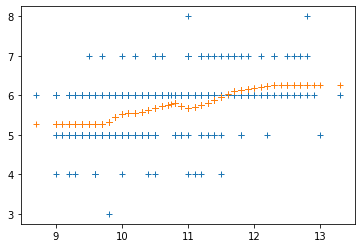

In [8]:
model1 = LinearRegressionModel(1,1).to(device)
criterion = torch.nn.MSELoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr = 0.001)

for epoch in range(30000): 
    model1.train()
    pred_y = model1(x_train1) 
    loss = criterion(pred_y, y_train) 
    optimizer1.zero_grad() 
    loss.backward() 
    optimizer1.step() 
    if epoch % 3000 == 2999:
        print('epoch {}, loss {}'.format(epoch, loss.item())) 
    if epoch == 29999:
        train_loss_dict['1'] = loss.item() / len(train)
        model1.eval()
        y_pred = model1(x_test1)
        loss = criterion(y_pred, y_test)
        test_loss_dict['1'] = loss.item() / len(test)
        plt.plot(x_test1.cpu().numpy(), y_test.cpu().numpy(), '+')
        plt.plot(x_test1.cpu().numpy(), y_pred.detach().cpu().numpy(), '+')
        plt.show()

epoch 2999, loss 0.5140945911407471
epoch 5999, loss 0.49651867151260376
epoch 8999, loss 0.5054088234901428
epoch 11999, loss 0.47636422514915466
epoch 14999, loss 0.4645819067955017
epoch 17999, loss 0.4602592885494232
epoch 20999, loss 0.4477143883705139
epoch 23999, loss 0.42057517170906067
epoch 26999, loss 0.4200630486011505
epoch 29999, loss 0.39221450686454773


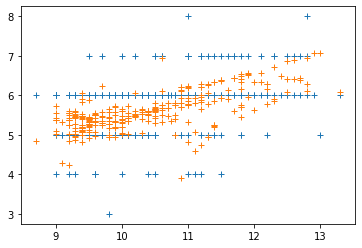

In [9]:
model2 = LinearRegressionModel(2,1).to(device)
criterion = torch.nn.MSELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr = 0.001)

for epoch in range(30000): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    model2.train()
    pred_y = model2(x_train2) 
    loss = criterion(pred_y, y_train) 
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer2.zero_grad() 
    loss.backward() 
    optimizer2.step() 
    if epoch % 3000 == 2999:
        print('epoch {}, loss {}'.format(epoch, loss.item())) 
    if epoch == 29999:
        train_loss_dict['2'] = int(loss.item() / len(train))
        model2.eval()
        y_pred = model2(x_test2)
        loss = criterion(y_pred, y_test)
        test_loss_dict['2'] = int(loss.item()/len(test))
        plt.plot(x_test1.cpu().numpy(), y_test.cpu().numpy(), '+')
        plt.plot(x_test1.cpu().numpy(), y_pred.detach().cpu().numpy(), '+')
        plt.show()

epoch 2999, loss 0.08462189137935638
epoch 5999, loss 0.03510802984237671
epoch 8999, loss 0.0571531318128109
epoch 11999, loss 0.04120243713259697
epoch 14999, loss 0.027381176128983498
epoch 17999, loss 0.020094919949769974
epoch 20999, loss 0.013223699294030666
epoch 23999, loss 0.009154178202152252
epoch 26999, loss 0.005836843512952328
epoch 29999, loss 0.012384279631078243


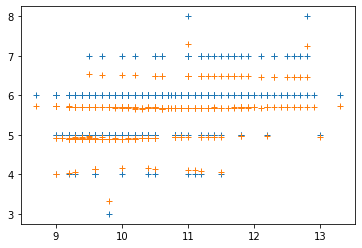

In [10]:
model3 = LinearRegressionModel(3,1).to(device)
criterion = torch.nn.MSELoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr = 0.001)

for epoch in range(30000): 
  
    # Forward pass: Compute predicted y by passing  
    # x to the model 
    model3.train()
    pred_y = model3(x_train3) 
    loss = criterion(pred_y, y_train) 
    # Zero gradients, perform a backward pass,  
    # and update the weights. 
    optimizer3.zero_grad() 
    loss.backward() 
    optimizer3.step() 
    if epoch % 3000 == 2999:
        print('epoch {}, loss {}'.format(epoch, loss.item())) 
    if epoch == 29999:
        train_loss_dict['3'] = int(loss.item() / len(train))
        model3.eval()
        y_pred = model3(x_test3)
        loss = criterion(y_pred, y_test)
        test_loss_dict['3'] = int(loss.item()/len(test))
        plt.plot(x_test1.cpu().numpy(), y_test.cpu().numpy(), '+')
        plt.plot(x_test1.cpu().numpy(), y_pred.detach().cpu().numpy(), '+')
        plt.show()

In [11]:
model4 = LinearRegressionModel(4,1).to(device)
criterion = torch.nn.MSELoss()
optimizer4 = torch.optim.Adam(model4.parameters(), lr = 0.001)

for epoch in range(30000): 
    model4.train()
    pred_y = model4(x_train4) 
    loss = criterion(pred_y, y_train) 
    optimizer4.zero_grad() 
    loss.backward() 
    optimizer4.step() 
    if epoch % 3000 == 2999:
        print('epoch {}, loss {}'.format(epoch, loss.item())) 
    if epoch == 29999:
        train_loss_dict['4'] = int(loss.item() / len(train))
        model4.eval()
        y_pred = model4(x_test4)
        loss = criterion(y_pred, y_test)
        test_loss_dict['4'] = int(loss.item()/len(test))
        #plt.plot(x_test1.cpu().numpy(), y_test.cpu().numpy(), '+')
        #plt.plot(x_test1.cpu().numpy(), y_pred.detach().cpu().numpy(), '+')
        #plt.show()

epoch 2999, loss 0.049237702041864395
epoch 5999, loss 0.03772055730223656
epoch 8999, loss 0.12091387063264847
epoch 11999, loss 0.10494492948055267
epoch 14999, loss 0.10071715712547302
epoch 17999, loss 0.09718888998031616
epoch 20999, loss 0.079220250248909
epoch 23999, loss 0.07317908853292465
epoch 26999, loss 0.07274460047483444
epoch 29999, loss 0.08222279697656631


In [12]:
model5 = LinearRegressionModel(5,1).to(device)
criterion = torch.nn.MSELoss()
optimizer5 = torch.optim.Adam(model5.parameters(), lr = 0.001)

for epoch in range(30000): 
    model5.train()
    pred_y = model5(x_train5) 
    loss = criterion(pred_y, y_train) 
    optimizer5.zero_grad() 
    loss.backward() 
    optimizer5.step() 
    if epoch % 3000 == 2999:
        print('epoch {}, loss {}'.format(epoch, loss.item())) 
    if epoch == 29999:
        train_loss_dict['5'] = int(loss.item() / len(train))
        model5.eval()
        y_pred = model5(x_test5)
        loss = criterion(y_pred, y_test)
        test_loss_dict['5'] = int(loss.item()/41)
        #plt.plot(x_test1.cpu().numpy(), y_test.cpu().numpy(), '+')
        #plt.plot(x_test1.cpu().numpy(), y_pred.detach().cpu().numpy(), '+')
        #plt.show()

epoch 2999, loss 0.048352502286434174
epoch 5999, loss 0.03825890272855759
epoch 8999, loss 0.03382202982902527
epoch 11999, loss 0.02702145464718342
epoch 14999, loss 0.0218022633343935
epoch 17999, loss 0.018018485978245735
epoch 20999, loss 0.014715994708240032
epoch 23999, loss 0.011157716624438763
epoch 26999, loss 0.009194552898406982
epoch 29999, loss 0.006972353905439377


In [16]:
zeros = torch.zeros([len(train),4]).to(device)
xwithzeros1 = torch.cat((x_train1, zeros),1)
zeros = torch.zeros([len(train),3]).to(device)
xwithzeros2 = torch.cat((x_train2, zeros),1)
zeros = torch.zeros([len(train),2]).to(device)
xwithzeros3 = torch.cat((x_train3, zeros),1)
zeros = torch.zeros([len(train),1]).to(device)
xwithzeros4 = torch.cat((x_train4, zeros),1)
x_final = torch.cat(((xwithzeros1,xwithzeros2,xwithzeros3,xwithzeros4,x_train5)))
y_final = torch.cat(((y_train, y_train, y_train, y_train,y_train)))

In [ ]:
model6 = LinearRegressionModel(5,1).to(device)
criterion = torch.nn.MSELoss()
optimizer6 = torch.optim.Adam(model6.parameters(), lr = 0.001)
for epoch in range(70000): 
    model6.train()
    pred_y = model6(x_final) 
    loss = criterion(pred_y, y_final) 
    optimizer6.zero_grad() 
    loss.backward() 
    optimizer6.step() 
    if epoch % 10000 == 9999:
        print('epoch {}, loss {}'.format(epoch, loss.item())) 
    if epoch == 69999:
        train_loss_dict[6] = int(loss.item() / (len(train)*5))

epoch 9999, loss 0.2278706133365631
epoch 19999, loss 0.20184841752052307


In [ ]:
zeros = torch.zeros([41,4]).to(device)
xwithzeros1 = torch.cat((x_test1, zeros),1)
zeros = torch.zeros([41,3]).to(device)
xwithzeros2 = torch.cat((x_test2, zeros),1)
zeros = torch.zeros([41,2]).to(device)
xwithzeros3 = torch.cat((x_test3, zeros),1)
zeros = torch.zeros([41,1]).to(device)
xwithzeros4 = torch.cat((x_test4, zeros),1)

In [ ]:
model6.eval()
y_pred = model6(xwithzeros1)
loss = criterion(y_pred, y_test)
test_loss_dict['n1'] = int(loss.item()/len(test))

y_pred = model6(xwithzeros2)
loss = criterion(y_pred, y_test)
test_loss_dict['n2'] = int(loss.item()/len(test))

y_pred = model6(xwithzeros3)
loss = criterion(y_pred, y_test)
test_loss_dict['n3'] = int(loss.item()/len(test))

y_pred = model6(xwithzeros4)
loss = criterion(y_pred, y_test)
test_loss_dict['n4'] = int(loss.item()/len(test))

y_pred = model6(x_test5)
loss = criterion(y_pred, y_test)
test_loss_dict['n5'] = int(loss.item()/len(test))

In [ ]:
print(train_loss_dict)

In [ ]:
print(test_loss_dict)